# Linear Algebra
## Scipy Modules

- Scipy has two main linear algebra modules: `scipy.linalg` and `scipy.sparse.linalg`
    - `scipy.sparse.linalg` has specialized algorithms for _sparse_ matrices


- _Dense_ matrix example

$$
D = 
\begin{pmatrix}
121&52&661&23&205&34&12&12\\
20&16&0&64&0&123&153&135\\
77&5&42&2&10&623&23&97\\
314&431&817&11&23&23&23&199\\
29&541&428&9&112&124&734&46\\
325&0&450&88&12&534&345&125\\
129&324&76&95&342&23&45&632\\
13&20&12&122&431&1&123&978
\end{pmatrix}
$$

- Majority matrix elements are non-zero

- _Sparse_ matrix example

$$
S = 
\begin{pmatrix}
61&0&0&0&0&0&0&0\\
0&112&0&0&0&0&0&0\\
0&0&10&0&0&65&0&45\\
0&0&0&12&0&0&0&0\\
0&0&0&0&153&234&0&0\\
0&0&0&0&0&21&0&0\\
0&230&0&0&0&0&0&0\\
0&0&0&0&0&0&0&97
\end{pmatrix}
$$

- Only 11 out of 64 matrix elements are non-zero

- Both `scipy.linalg` and `scipy.sparse.linalg` are interfaces to two standard libraries
    - BLAS  - basic linear algebra subprograms
        - Contains optimized routines for vector addition, dot products, matrix multiplication etc.
    - LAPACK - linear algebra package
        - Implements optimized routines for matrix decompositions/factorizations, solving linear systems, eigenvalue problems, and linear least squares

- Functions provided by `scipy.linalg`
    - Basic functions – `det`, `inv`, `pinv`, …
    - Linear system solvers - `solve`, `solve_banded`, `solve_triangular`, `lstsq`, $\cdots$
    - Eigenproblem solvers – `eig`, `eigvals`, `eig_banded`, `eigvals_banded`, $\cdots$
    - Matrix decompositions – `lu`, `qr`, `cholesky`, `schur`, $\cdots$

## Pseudoinverse of a Matrix

- For a non-singular square matrix $A$, the inverse $A^{-1}$ satisfies:

$$ A^{-1} A = A A^{-1} = I $$

- _Moore-Penrose pseudo-inverse_ $A^+$ of a matrix $A$ satisfies:

$$
AA^+ A = A \\
A^+ A A^+ = A^+ \\
(A A^+)^T = A A^+ \\
(A^+ A)^T = A^+ A
$$


- $A^+$ exists for any matrix - including singular and non-square matrices

- For matrices with linearly independent rows (right inverse):

$$ A^+ = A^T (A A^T)^{-1} \qquad AA^+ = I $$

- For matrices with linearly independent columns (left inverse):

$$ A^+ = (A^T A)^{-1} A^T \qquad A^+ A = I $$

- For non-singular square matrices, this simplifies to $A^+ = A^{-1}$ in both cases
- The pseudo-inverse's dimensions are $n \times m$ if the matrix $A$ has dimensions $m \times n$

- `pinv` from `scipy`s `linalg` module can be used to compute the pseudo-inverse

In [2]:

import numpy as np
from scipy import linalg

A = np.array([[ 1, 4, 3, 2],
              [ 3, 5, 2, 1],
              [-1, 0, 6, 0]])

print(repr(linalg.pinv(A))) # Right inverse


array([[-0.35133599,  0.34451393,  0.05059693],
       [ 0.13587265,  0.03666856, -0.07134736],
       [-0.058556  ,  0.05741899,  0.17509949],
       [ 0.49175668, -0.33172257, -0.14525298]])


In [4]:

B = np.array([[1, 3], [2, 6], [4, 7]])
print(repr(linalg.pinv(B))) # Left inverse


array([[-0.28, -0.56,  0.6 ],
       [ 0.16,  0.32, -0.2 ]])


## Linear System of Equations

- A linear system of equations are a set of $m$ linear equations in $n$ variables $x_1, x_2, \cdots, x_n$

$$
\begin{align*}
    a_{11} x_1\ +&\ a_{12} x_2\ +\ \cdots\ +\ a_{1n} x_n\ =\ b_1 \\
    a_{21} x_1\ +&\ a_{22} x_2\ +\ \cdots\ +\ a_{2n} x_n\ =\ b_2 \\
                 &\ \vdots    \  \       \  \           \  \ \vdots \\
    a_{n1} x_1\ +&\ a_{n2} x_2\ +\ \cdots\ +\ a_{nn} x_n\ =\ b_n
\end{align*}
$$

- In matrix form:

$$ A x = b $$

$$
A = \begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
    \end{bmatrix} \qquad
x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix} \qquad
b = \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}
$$

- To determine $x$, we can use the inverse if $m=n$ and all rows are linearly independent:
    
$$ x = A^{-1} b$$

- This is computationally inefficent
- More efficient algorithms 
    - _Gauss elimination_
    - _Gauss-Jordan elimination_
    - _LU decomposition_
    - _Cholesky decomposition_

- _Scipy_ uses LU decomposition by default
- Cholesky decomposition is used if the matrix $A$ is symmetric and positive-definite

- If the number of equations is not the same as the number of unknowns, i.e., $m \ne n$, we can use the `lstsq` function
- The least squares algorithm computes the vector $x$ that minimizes the least squares error $\lvert b - Ax \rvert$

$$
\lvert b - Ax \rvert^2 = \sum\limits_{i=1}^m (b_i - (Ax)_i)^2
$$

- It can be shown that the $x$ that minimizes $\lvert b - Ax \rvert$ is given by:

$$ x = A^+ b $$

- Here $A^+$ is the pseudo-inverse of $A$

In [5]:

A = np.array([[ 1, 4, 3, 2],
              [ 3, 5, 2, 1],
              [-1, 0, 6, 0]])
b = np.array([2, 1, -2])
res = linalg.lstsq(A, b)
res


(array([-0.4593519 ,  0.45110858, -0.40989198,  0.94229676]),
 array([], dtype=float64),
 3,
 array([8.63395251, 5.46582073, 1.25684835]))

In [7]:

x = res[0]
(A @ x - b).round(4)


array([-0., -0.,  0.])

In [8]:

A = np.array([[1, 3],
              [2, 6],
              [4, 7]])
b = np.array([1, 2, 3])
res = linalg.lstsq(A, b)
res


(array([0.4, 0.2]),
 6.943647297459356e-32,
 2,
 array([10.67251474,  1.04758252]))

In [9]:

x = res[0]
(A @ x - b).round(4)


array([-0., -0., -0.])

- Consider some data collected from experiments

![data](../images/linear_system_of_equations.png)

- We want to fit this data to a quadratic curve (hypothesis) of the form $a_1 + a_2 x + a_3 x^2$

- We can obtain the unknown coefficients $a_1$, $a_2$ and $a_3$ by solving the linear system formed by the observed data

$$
\begin{align*}
    &a_1\ +\ a_2 x_1\ +\ a_3 x_1^2\ =\ y_1 \\
    &a_1\ +\ a_2 x_2\ +\ a_3 x_2^2\ =\ y_2 \\
    \quad & \vdots \qquad \vdots \qquad \vdots & \\
    &a_1\ +\ a_2 x_7\ +\ a_3 x_7^2\ =\ y_n
\end{align*}
$$

In [10]:

x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
M = x.reshape(x.size, 1)**[0, 1, 2]
M


array([[ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  ,  8.5 , 72.25]])

In [11]:

res = linalg.lstsq(M, y)
res


(array([0.0578403 , 0.07701453, 0.11262261]),
 0.3954624919193902,
 3,
 array([94.14628205,  4.12516865,  0.63091939]))

In [12]:

linalg.pinv(M) @ y


array([0.0578403 , 0.07701453, 0.11262261])

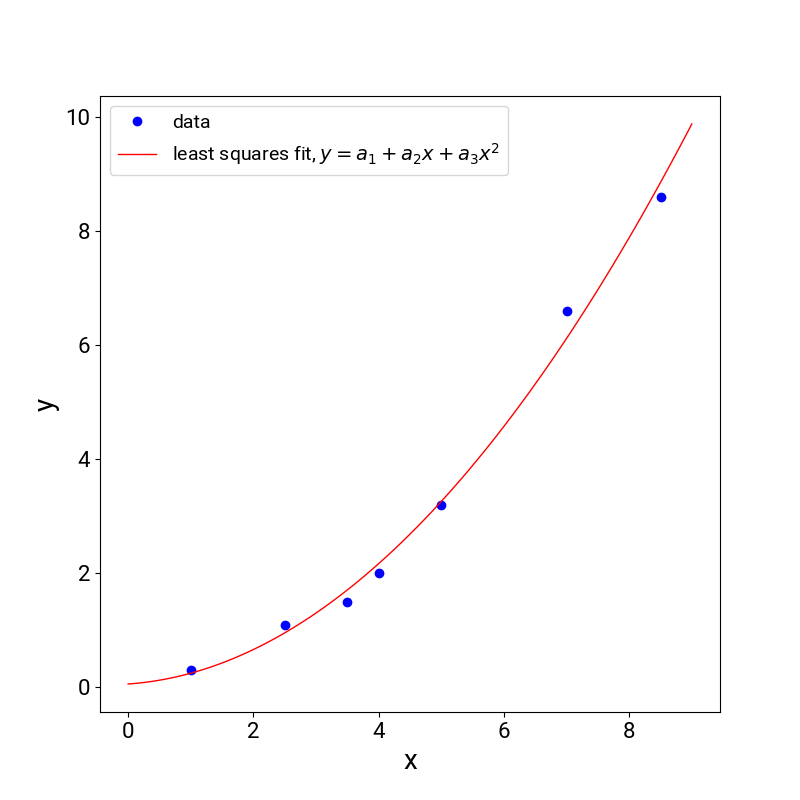

In [15]:

%matplotlib widget
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y, 'ob', label='data')
a = res[0]
xx = np.linspace(0, 9, 101)
yy = a[0] + a[1]*xx + a[2]*xx**2
ax.plot(xx, yy, '-r', label='least squares fit, $y = a_1 + a_2x + a_3x^2$')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.legend(fontsize=14)
ax.tick_params(labelsize=16)
fig.set_size_inches(8, 8)


## Solving Linear Systems

- Numerical approaches to solving linear system of equations
    - Direct solvers 
        - Use methods based on eliminations that lead to matrix decomposition or factorization
        - Matrix decompositions
            - LU decomposition
            - Cholesky decomposition
            - Eigen decomposition
            - QR decomposition
            - $\cdots$
    - Indirect solvers
        - Start with a guess and iteratively improve the guess
        - Methods
            - Jacobi
            - Gauss-Seidel 
            - Sparse indirect solvers - Conjugate Gradient (CG), BIConjugate Gradient (BiCG), Generalized Minimum RESidual (GMRES), …


### Direct Solvers

- The solution of linear system $Ax=b$ is straightforward if the coefficient matrix $A$ has a special form (diagonal, lower or upper triangular forms)

- _Forward substitution algorithm_
    - Applicable for a lower triangular linear systems $Lx = b$ where $L$ is a lower triangular matrix

$$
L = \begin{bmatrix}
    l_{11} & 0 & \cdots & 0 \\
    l_{21} & l_{22} & \cdots & 0 \\
    \vdots & \vdots & \ddots & 0 \\
    l_{n1} & l_{n2} & \cdots & l_{nn}
    \end{bmatrix} 
\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}
= \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}
\implies
\begin{align*}
x_1 &= \frac{b_1}{l_11} \\
x_2 &= \frac{b_2 - l_{21} x_1}{l_{22}} \\
&\vdots \\
x_n &= \frac{b_n - \sum\limits_{i=1}^{n-1} l_{ni}x_i}{l_{nn}}
\end{align*}
$$

- If any of the diagonal terms are zero, the system is singular $\rightarrow$ use the _least squares method_

- _Backward substitution algorithm_
    - Applicable for an upper triangular linear systems $Ux = b$ where $U$ is an upper triangular matrix

$$
U = \begin{bmatrix}
    u_{11} & u_{12} & \cdots & u_{1n} \\
    0 & u_{22} & \cdots & u_{2n} \\
    \vdots & \vdots & \ddots & 0 \\
    0 & 0 & \cdots & u_{nn}
    \end{bmatrix} 
\begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}
= \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}
\implies
\begin{align*}
x_n &= \frac{b_n}{u_{nn}} \\
x_{n-1} &= \frac{b_{n-1} - u_{(n-1)n} x_n}{u_{(n-1)(n-1)}} \\
&\vdots \\
x_1 &= \frac{b_1 - \sum\limits_{i=2}^{n} u_{1i}x_i}{u_{11}}
\end{align*}
$$

- The algorithm works bottom up, solving for $x_n$ first and $x_1$ in the final step

- If any of the diagonal terms are zero, the system is singular $\rightarrow$ use the _least squares method_

- Gaussian elimination or row reduction
    - Algorithm for converting a given matrix to an equivalent upper triangular form
    - Uses 3 kinds of row operations sequentially
        - Swap the position of rows _i_ and _j_
        - Scale row _i_ by a non-zero value $\alpha$
        - Add a row _j_ scaled by a value of $\alpha$ to row _i_

- Gauss-Jordan elimination 
    - Extends the Gaussian elimination algorithm to convert a matrix to an equivalent diagonal form
    - Uses the same row operations
    - Can be used to determine the inverse of a matrix

### Gaussian Elimination

- Example:

$$
\begin{array}{ccc}
    A & x & b \\
    \begin{bmatrix}
        -1 & 2 & 1 \\
        5 & 4 & 2 \\
        1 & 1 & 1
    \end{bmatrix} & \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} & = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
\end{array}
$$

- The _augmented matrix_

![Gauss Elim1](../images/gaussian_elimination1.png)

- From the 1st column, choose a pivot row
    - The row with the max absolute value is used
    - Note: if all the values in the column are zero, then $A$ is singular and no solution exists

- Swap the pivot row with the first row

![Gauss Elim2](../images/gaussian_elimination2.png)

- Scale the pivot row (1st row now) so that the value in the 1st column is 1

![Gauss Elim3](../images/gaussian_elimination3.png)

- Add the pivot row to the rows below so that the values in the 1st column are zero

![Gauss Elim4](../images/gaussian_elimination4.png)

- Repeat the procedure with column 2 while ignoring row 1

![Gauss Elim5](../images/gaussian_elimination5.png)

- Repeat the procedure with column 2 while ignoring row 1

![Gauss Elim6](../images/gaussian_elimination6.png)

- Repeat the procedure with column 3 while ignoring rows 1 and 2

![Gauss Elim7](../images/gaussian_elimination7.png)

- The matrix is now in upper triangle form and can be solved using backward substitution algorithm

In [25]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import display

def viz_matrices(M1, M2, text=''):
    # Check input
    if not (isinstance(M1, np.ndarray) and isinstance(M2, np.ndarray)):
        raise TypeError("numpy arrays expected")
    
    # Num rows
    n = M1.shape[0]

    # Width of each cell
    w = 2

    # Create empty figure with three axes
    plt.ioff() # Will not show the figure unless explicitly asked to do so
    #plt.clf() # Clear the current figure
    fig, axs = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'width_ratios':[2, 1, 2]})

    # Decorate each axes
    M = [M1, None, M2]
    txtAxes = []
    fs = 6
    for p, ax in enumerate(axs):
        ax.axis('off')

        if p == 1:
            ax.quiver([0], [0], [1], [0], scale_units='x', scale=1, headwidth=12, headlength=10)
            txt = ax.text(0.5, 0.02, text, ha='center', fontsize=8)
            txtAxes.append(txt)
            ax.set_xlim(0, 1.2)
            continue

        # Add grid lines and data from M as text
        for i in range(n):
            ax.plot([0, w*(n+1)], [w*i, w*i], '-k')
            ax.plot([w*i, w*i], [0, w*n], '-k')
            for j in range(n+1):
                txt = ax.text(w*(j + 0.5), w*(n - i - 0.5), f'{M[p][i, j]:6.2f}', ha='center', fontsize=fs)
                txtAxes.append(txt)

        ax.plot([0, w*(n+1)], [w*n, w*n], '-k')
        ax.plot([w*n, w*n], [0, w*n], '--b')
        ax.plot([w*(n+1), w*(n+1)], [0, w*n], '-k')

    #fig.set_size_inches(12, 3)

    return (fig, txtAxes)

def gauss_elim(A, b):
    if not (isinstance(A, np.ndarray) and isinstance(b, np.ndarray)):
        raise TypeError("numpy array expected")

    n = A.shape[0]
    if n != b.shape[0]:
        raise Exception("Incompatible dimensions")

    # Row operation functions
    def scale_row(M, i, a):
        M[i] *= a

    def add_row(M, i, j, a):
        M[i] += a*M[j]

    def swap_row(M, i, j):
        M[[i, j]] = M[[j, i]]

    # Reshape b to a column vector
    b = b.reshape(n, 1)

    # Augmented matrix
    B = np.hstack((A, b))
    print(B, '\n')

    #ax.table(cellText = B, loc='center')
    
    # Loop over the rows
    for i in range(n):
        # Determine the pivot location
        j = np.argmax(np.abs(B[:, i][i::])) + i

        # Swap rows
        swap_row(B, i, j)

        # Scale row
        scale_row(B, i, 1/B[i,i])

        # Pivoting
        for p in range(i+1, n):
            add_row(B, p, i, -B[p, i])
        print(B, '\n')

    return B

def gauss_elim_interactive(A, b):
    if not (isinstance(A, np.ndarray) and isinstance(b, np.ndarray)):
        raise TypeError("numpy array expected")

    n = A.shape[0]
    if n != b.shape[0]:
        raise Exception("Incompatible dimensions")

    # Row operation functions
    def scale_row(M, i, a):
        M[i] *= a

    def add_row(M, i, j, a):
        M[i] += a*M[j]

    def swap_row(M, i, j):
        M[[i, j]] = M[[j, i]]

    # Reshape b to a column vector
    b = b.reshape(n, 1)

    # Augmented matrix
    B = np.hstack((A, b))

    # Visualization stuff
    ## Create a figure
    fig, txtAxs = viz_matrices(B, B, "Init")

    ## Create button
    button = ipywidgets.Button(description='Next',
                               disabled=False,
                               button_style='', # 'success', 'info', 'warning', 'danger' or ''
                               tooltip='Next',
                               icon='arrow-right') # (FontAwesome names without the `fa-` prefix)
    output = ipywidgets.Output()

    ## Button callback
    global i, opCount
    i = 0 # Keep track of the iterations
    opCount = 0 # Keep track of the row operations
    def update_viz_matrices(button):
        # Needed in order to modify i, opCount
        # Not required if just accessing them
        global i, opCount

        with output:
            Bprev = np.copy(B)
            text = ''
            
            # Do nothing if reached the last row
            if i >= n:
                button.description = "Algorithm ended!"
                button.disabled = True
                return

            if opCount%3 == 0:
                # Update the augmented matrix
                # Determine the pivot location
                j = np.argmax(np.abs(B[:, i][i::])) + i

                if i != j:
                    # Swap rows
                    swap_row(B, i, j)
                    
                    text = f'Swap rows {i+1} and {j+1}'
                else:
                    text = f'No swapping'

            if opCount%3 == 1:
                text = f'Scale row {i+1} by {B[i,i]:4.2f}'
                
                # Scale row
                scale_row(B, i, 1/B[i,i])

            if opCount%3 == 2:
                # Pivoting
                for p in range(i+1, n):
                    add_row(B, p, i, -B[p, i])

                if i+1 < n:
                    text = f'Pivot rows {i+2} to {n}'
                    
                else:
                    text = 'Algorithm ended!'

            for c, ax in enumerate(txtAxs):
                if c < n*(n+1):
                    ax.set_text(f'{Bprev[c//(n+1), c%(n+1)]:4.2f}')
                elif c > n*(n+1):
                    ax.set_text(f'{B[(c-1)//(n+1) - n, (c-1)%(n+1)]:4.2f}')
                    if B[(c-1)//(n+1) - n, (c-1)%(n+1)] != Bprev[(c-1)//(n+1) - n, (c-1)%(n+1)]:
                        ax.set_c('r')
                    else:
                        ax.set_c('k')
                else:
                    ax.set_text(text)
            fig.canvas.draw()
            fig.canvas.flush_events()
            opCount += 1
        i = opCount//3

    ## Add callback to the button
    button.on_click(update_viz_matrices)

    ## Box with the figure
    display(ipywidgets.VBox([button, output, fig.canvas]))

In [26]:
A = np.array([[1, 2, 3, 7, 10],
              [13, 4, 5, 12, 15],
              [7, 8, 3, 0, 18],
              [12, 8, 9, 1, 5],
              [10, 1, 9, 8, 7]], dtype=float)

b = np.array([2, 2, 2, 2, 2], dtype=float)

gauss_elim_interactive(A, b)

## Matrix Decomposition

- Gaussian elimination is restricted to a specific RHS vector $b$
- This is disadvantageous when it is required to solve a linear system with the same $A$ but different RHS vectors

- A more efficient approach is decomposition or factorization of a matrix that can be reused for different $b$
- Matrices once decomposed will simplify the solution procedure for the linear system
- Scipy’s matrix decomposition functions:
    - `lu`, `ldl`, `svd`, `cholesky`, `polar`, `qr`, `qz`, `schur`, `eig`, $\cdots$

### LU Decomposition

- LU decomposition is based on the matrix form of the Gaussian elimination algorithm
    - Decomposes the matrix into a product of a lower triangular and an upper triangular matrices, thus the name LU

$$ A = LU $$

$$
\begin{pmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{pmatrix}
=
\begin{pmatrix}
     1 &      0 &      0 & 0 \\
l_{21} &      1 &      0 & 0 \\
l_{31} & l_{32} &      1 & 0 \\
l_{41} & l_{42} & l_{43} & 1
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & u_{13} & u_{14} \\
     0 & u_{22} & u_{23} & u_{24} \\
     0 &      0 & u_{33} & u_{34} \\
     0 &      0 &      0 & u_{44}
\end{pmatrix}
$$

- Some matrices do not possess an LU decomposition
    - However, a decomposition exists if the rows are permuted
    - The decomposition in this case looks like $A = PLU$ where $P$ is the permutation matrix

- Solving a linear system given the LU decomposition

$$ Ax = LUx = b $$

- Denoting $Ux=y$, $Ax=Ly=b \rightarrow$ solve using forward substitution algorithm

- Once $y$ is known, solve $Ux=y$ using the backward substitution algorithm for $x$

In [16]:

from scipy import linalg

A = np.array([[9, 3, 4],
              [4, 3, 4],
              [1, 1, 1]], dtype=float)

linalg.lu(A)


(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.44444444, 1.        , 0.        ],
        [0.11111111, 0.4       , 1.        ]]),
 array([[ 9.        ,  3.        ,  4.        ],
        [ 0.        ,  1.66666667,  2.22222222],
        [ 0.        ,  0.        , -0.33333333]]))

- Output is a `tuple` of `ndarray`s, i.e., `(P, L, U)`

### Cholesky Decomposition

- Cholesky decomposition is a special case of LU decomposition
    - Applicable to symmetric positive-definite matrices

$$ A = A^T \qquad \text{Symmetry} \\ x^T A x > 0 \qquad x\ \text{is an arbitrary vector} $$

$$ A = LL^T = U^T U \\ U = L^T $$

### Eigen Decomposition

- _Eigenvectors_ $v$ of a matrix $A$ are vectors that satisfy ($\lambda$ are _eigenvalues_):

$$ A v = \lambda v $$

- If the eigenvectors are linearly independent, then $A$ can be factorized as:

$$ A = QDQ^{-1} $$

- $Q$ is a matrix formed by joining the eigenvectors (each column of $Q$ is an eigenvector)
- $D$ is a diagonal matrix formed by the corresponding eigenvalues
- For a symmetric positive-definite matrix, $Q^{−1} = Q^T$, i.e., $Q$ is an orthogonal matrix

In [19]:

A = np.array([[9, 3, 4],
              [4, 3, 4],
              [1, 1, 1]], dtype=float)

la, v = linalg.eig(A)
print("Eigenvalues:  ", la.real)
for i in range(3):
    print(f"Eigenvector {i}:", v[:, i])


Eigenvalues:   [11.275622    1.95159452 -0.22721652]
Eigenvector 0: [0.86622734 0.48211224 0.13121732]
Eigenvector 1: [ 0.51375558 -0.80249012 -0.30342182]
Eigenvector 2: [-0.03309737 -0.76141963  0.64741387]


## Gauss-Seidel & Jacobi Methods

- Iterative procedures that split the coefficient matrix $A$ into three parts

$$A = L + D + U$$

- The lower triangular part $L$, the diagonal part $D$ and the upper triangular part $U$


$$
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$$

$$
L = \begin{bmatrix}
0 & 0 & \cdots & 0 \\
a_{21} & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & 0
\end{bmatrix}
\qquad
D = \begin{bmatrix}
a_{11} & 0 & \cdots & 0 \\
0 & a_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & a_{nn}
\end{bmatrix}
\qquad
U = \begin{bmatrix}
0 & a_{12} & \cdots & a_{1n} \\
0 & 0 & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{bmatrix}
$$

### Gauss-Seidel Method

- The linear system is rewritten as:

$$ Ax=b \quad \rightarrow \quad (L+D)x = b-Ux $$

- Assuming the values of $x=x^{(0)}$ on the RHS and using the forward substitution algorithm, an iterative update scheme is used

$$ (L+D) x^{(k+1)} = b - U x^{(k)} $$

- Here $x^{(k)}$ is the vector containing the solution at $k^th$ iteration

### Jacobi Method

- The linear system is rewritten as:

$$ Ax=b \quad \rightarrow \quad Dx = b-(L+U)x $$

- Starting with an initial guess of $x=x^{(0)}$, the iterative update scheme is:

$$ D x^{(k+1)} = b - (L+U) x^{(k)} $$

- Gauss-Seidel method converges if $A$ is symmetric positive-definite
- If $A$ is not symmetric, a sufficient but not necessary condition for convergence is that $A$ is strictly diagonally dominant

$$ \lvert a_{ii} \rvert > \sum\limits_{i \ne j,j=1}^{n} \lvert a \rvert_{ij} $$

- This sufficiency condition is applicable to both the methods